###(과제) 3.아마존(AMZN)

In [17]:
#작업에 필요한 라이브러리(데이터 받기, 데이터 포멧변경, 그래프 작성)
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# 페이팔 주식 데이터를 가져옵니다.
start_date = '2015-09-01'
end_date = '2023-06-30'
ticker = 'AMZN'
data_amzn = yf.download(ticker, start=start_date, end=end_date)

# 데이터프레임으로 변환합니다.
df_amzn = pd.DataFrame(data_amzn['Close'])
df_amzn.columns = [ticker + 'price']
df_amzn.index.name = 'date'

# 시작일 이후의 데이터만 필터링합니다.
df_amzn = df_amzn[df_amzn.index >= '2015-09-01']


# 기준 금리 데이터 : 미리보기
df_amzn

[*********************100%%**********************]  1 of 1 completed


,AMZNprice
date,
2015-09-01,24.827000
2015-09-02,25.527500
2015-09-03,25.236000
2015-09-04,24.950001
2015-09-08,25.877001
...,...
2023-06-23,129.330002
2023-06-26,127.330002
2023-06-27,129.179993


In [ ]:
#주가 데이터를 CSV 파일로 저장

# CSV 파일로 저장
from google.colab import files

df_amzn.to_csv('amzn.csv', encoding='utf-8-sig')

# 파일을 다운로드합니다.
files.download('amzn.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

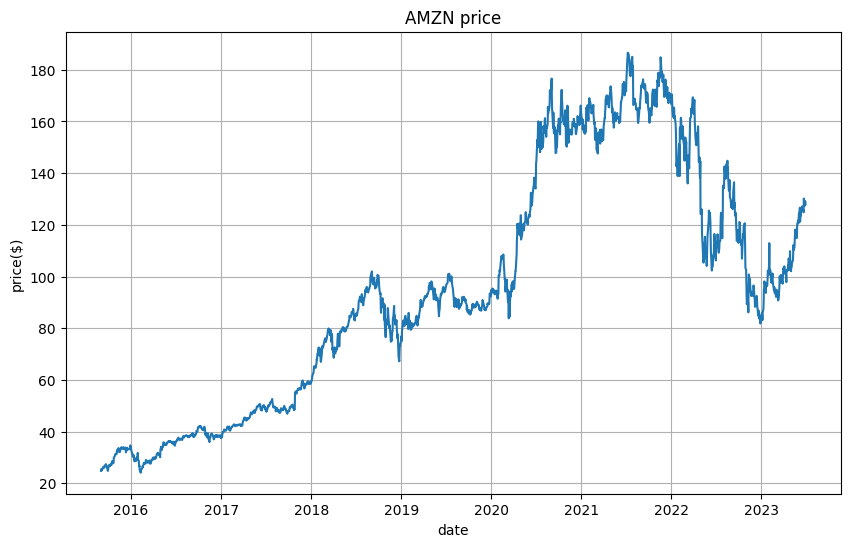

In [19]:
# 차트(그래프) 작성
plt.figure(figsize=(10, 6))
plt.plot(df_amzn)
plt.title(ticker + ' price')
plt.xlabel('date')
plt.ylabel('price($)')
plt.grid(True)
plt.show()

  ## 2. FRED (Federal Reserve Economic Data) API를 사용해서 데이터를 받기
  

### 1. Fred API를 Colab에 설치하기


In [27]:
pip install fredapi


###2. API를 활용해서 데이터 받기

#### 2-1 데이터를 받아오는 코드

In [21]:
#차트를 그리는 라이브러리 사용
#기준금리 데이터를 받아오는 라이브러리 사용
import matplotlib.pyplot as plt
import pandas as pd
from fredapi import Fred

# FRED API 키 입력
fred = Fred(api_key='b2182a80ba352b4be7486642fe6444c7')

# 기준금리 데이터를 가져옵니다. (시작일, 종료일)
data_interest = fred.get_series('DFF', start_date='2017-11-09', end_date='2023-06-30')


# 데이터프레임으로 변환합니다. (한글, 영어 모두 가능)
df_interest = pd.DataFrame(data_interest, columns=['기준금리'])
df_interest.index.name = '날짜'

# 시작일 이후의 데이터만 필터링합니다.
df_interest = df_interest[df_interest.index >= '2017-11-09']


# 기준 금리 데이터 : 미리보기
df_interest

,기준금리
날짜,
2017-11-09,1.16
2017-11-10,1.16
2017-11-11,1.16
2017-11-12,1.16
2017-11-13,1.16
...,...
2023-08-14,5.33
2023-08-15,5.33
2023-08-16,5.33


In [22]:
# 기준금리 데이터 출력
print(df_interest)

            기준금리
날짜              
2017-11-09  1.16
2017-11-10  1.16
2017-11-11  1.16
2017-11-12  1.16
2017-11-13  1.16
...          ...
2023-08-14  5.33
2023-08-15  5.33
2023-08-16  5.33
2023-08-17  5.33
2023-08-18  5.33

[2109 rows x 1 columns]


#### 2-2 데이터를 저장하는 코드

In [23]:
# 기준금리 데이터를 CSV 파일로 저장

# CSV 파일로 저장합니다.
from google.colab import files

df_interest.to_csv('interest.csv', encoding='utf-8-sig')

# 파일을 다운로드합니다.
files.download('interest.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### 2-3 차트로 만들기

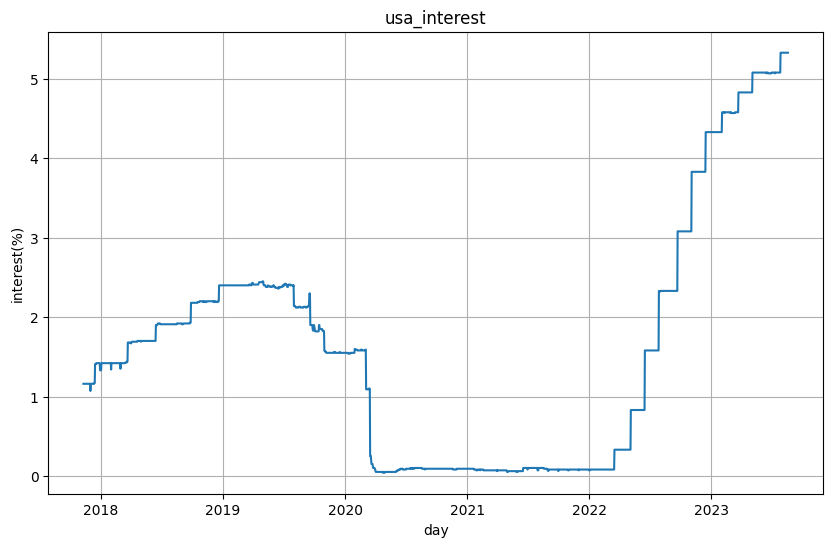

In [24]:
# 차트를 그립니다.
plt.figure(figsize=(10, 6))
plt.plot(df_interest)  #df_interest 대신에 "data_interest"를 입력하면 어떻게 달라질까요?
plt.title('usa_interest')
plt.xlabel('day')
plt.ylabel('interest(%)')
plt.grid(True)
plt.show()

### 4. 응용 "기간"별 구분해서 시각화

In [25]:
# 1. 페이팔의 주가 불러오기
paypal_data = yf.download('PYPL', start="2017-11-09", end="2023-06-30")


[*********************100%%**********************]  1 of 1 completed


In [26]:
# 1. 페이팔의 주가 불러오기

[*********************100%***********************]  1 of 1 completed


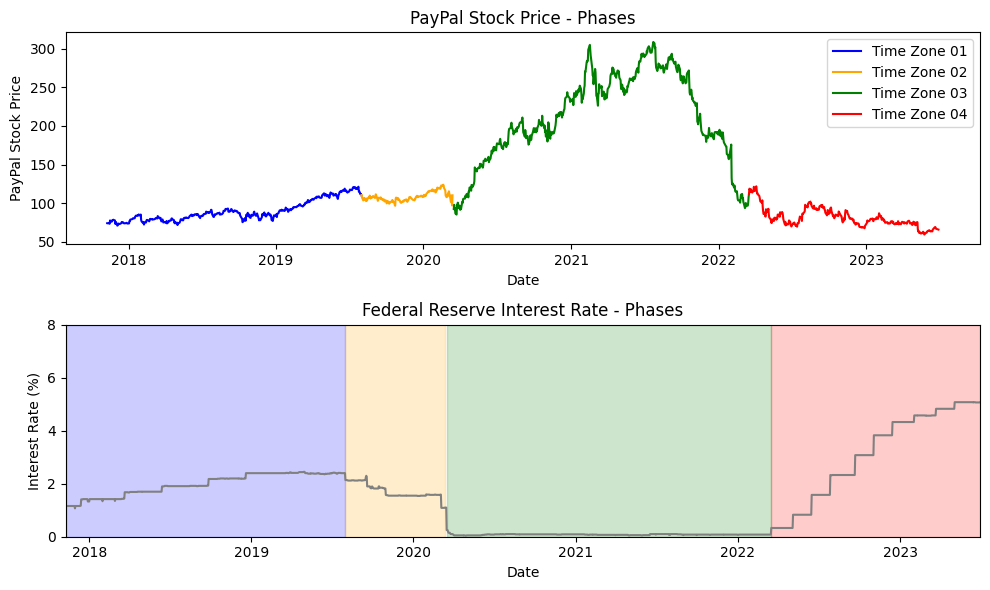

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from fredapi import Fred

# 1. Load PayPal's stock price data
paypal_data = yf.download('PYPL', start="2017-11-09", end="2023-06-30")

# 2. Define the start and end dates for each phase
phase1_start = '2017-11-09'
phase1_end = '2019-07-31'
phase2_start = '2019-07-31'
phase2_end = '2020-03-15'
phase3_start = '2020-03-15'
phase3_end = '2022-03-17'
phase4_start = '2022-03-17'
phase4_end = '2023-06-30'

# 3. 날짜 구간을 가져옴
phase1_data = paypal_data.loc[phase1_start:phase1_end]
phase2_data = paypal_data.loc[phase2_start:phase2_end]
phase3_data = paypal_data.loc[phase3_start:phase3_end]
phase4_data = paypal_data.loc[phase4_start:phase4_end]

# 4. 기준금리의 데이터를 가져옴
fred = Fred(api_key='b2182a80ba352b4be7486642fe6444c7')  # Replace 'YOUR_API_KEY' with your actual API key
interest_rate_data = fred.get_series('DFF', start_date="2017-11-09", end_date="2023-06-30")

# 5. 페이팔 주가를 3의 구간으로 나눔
phase1_data.index = pd.to_datetime(phase1_data.index)
phase2_data.index = pd.to_datetime(phase2_data.index)
phase3_data.index = pd.to_datetime(phase3_data.index)
phase4_data.index = pd.to_datetime(phase4_data.index)
interest_rate_data.index = pd.to_datetime(interest_rate_data.index)

# 6. 각 영역에 대한 색깔을 지정
colors = ['blue', 'orange', 'green', 'red']

# 7. 불러온 데이터를 "차트"에 입력
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(phase1_data.index, phase1_data['Close'], label='Time Zone 01', color=colors[0])
plt.plot(phase2_data.index, phase2_data['Close'], label='Time Zone 02', color=colors[1])
plt.plot(phase3_data.index, phase3_data['Close'], label='Time Zone 03', color=colors[2])
plt.plot(phase4_data.index, phase4_data['Close'], label='Time Zone 04', color=colors[3])
plt.xlabel("Date")
plt.ylabel("PayPal Stock Price")
plt.title("PayPal Stock Price - Phases")
plt.legend()

# 8. 기준금리 데이터도 위와 같이 진행
plt.subplot(2, 1, 2)
plt.plot(interest_rate_data.index, interest_rate_data, color='gray')
plt.xlabel("Date")
plt.ylabel("Interest Rate (%)")
plt.title("Federal Reserve Interest Rate - Phases")
plt.xlim(pd.to_datetime("2017-11-09"), pd.to_datetime("2023-06-30"))  # Set the x-axis limit for interest rate chart
plt.ylim(0, 8)  # Set the y-axis limit for interest rate chart

# Create colored background for each phase
plt.axvspan(phase1_data.index[0], phase1_data.index[-1], color=colors[0], alpha=0.2)
plt.axvspan(phase2_data.index[0], phase2_data.index[-1], color=colors[1], alpha=0.2)
plt.axvspan(phase3_data.index[0], phase3_data.index[-1], color=colors[2], alpha=0.2)
plt.axvspan(phase4_data.index[0], phase4_data.index[-1], color=colors[3], alpha=0.2)

plt.tight_layout()
plt.show()


(과제) : 아마존, 어펌, s&p500 지수 주가데이터를 위의 차트와 같이 나오도록 실습해보기